#IMP_LIBERARIES

In [747]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler,PowerTransformer,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,LeaveOneOut,GroupShuffleSplit,TimeSeriesSplit,ShuffleSplit
from sklearn.tree import plot_tree
from scipy.stats import randint
import missingno as msng

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier,XGBRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

#READ_DATA

In [748]:
data=pd.read_csv("/content/drug200.csv")
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


#GROUPBY

In [785]:
def GROUPBY(BOL4):
   if BOL4=='GROUPS':
    print(data.groupby(['Sex', 'BP','Cholesterol'])['Drug'].sum().unstack())
    # sns.clustermap(data ,cmap='coolwarm',standard_scale=1)

#RUN_GROUPBY

In [786]:
GROUPBY('GROUPS')

Cholesterol   0   1
Sex BP             
0   0        18  25
    1         2  22
    2        58  54
1   0        12  21
    1        10  12
    2        53  44


#ENCODING using listed comprehensive

In [750]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [751]:
data['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [752]:
data['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [753]:
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [754]:
ENCODING_MAP = {'DrugY': 2, 'drugC': 1,'drugX':0,'drugA':3,'drugB':4}
data['Drug'] = [ENCODING_MAP[i] for i in data['Drug']]

In [755]:
ENCODING_MAP = {'HIGH': 2, 'NORMAL': 1,'LOW':0}
data['BP'] = [ENCODING_MAP[i] for i in data['BP']]

In [756]:
ENCODING_MAP = {'HIGH': 1,'NORMAL':0}
data['Cholesterol'] = [ENCODING_MAP[i] for i in data['Cholesterol']]

In [757]:
ENCODING_MAP = {'F': 1,'M':0}
data['Sex'] = [ENCODING_MAP[i] for i in data['Sex']]

In [758]:
data['Drug'].unique()

array([2, 1, 0, 3, 4])

In [759]:
data['BP'].unique()

array([2, 0, 1])

In [760]:
data['Cholesterol'].unique()

array([1, 0])

In [761]:
data['Sex'].unique()

array([1, 0])

In [762]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,2
1,47,0,0,1,13.093,1
2,47,0,0,1,10.114,1
3,28,1,1,1,7.798,0
4,61,1,0,1,18.043,2
...,...,...,...,...,...,...
195,56,1,0,1,11.567,1
196,16,0,0,1,12.006,1
197,52,0,1,1,9.894,0
198,23,0,1,0,14.020,0


#EDA
##check-null and delete it if found

In [763]:
def EDA(DATA):
  if DATA =='DATA':
   null=data.isna().sum()
   columns=data.columns
   print("|----------------------------------------------------------DATA_EDA------------------------------------------------|\t\n")
   print("NULL_DATA\t\n")
   print(null)
   print("|------------------------------------------------------------------------------------------------------------------|\t\n")
   print("DATA_COLUMNS\t\n")
   print(columns)
   print("|------------------------------------------------------------------------------------------------------------------|\t\n")
   print("DATA_INFO\t\n")
   info=data.info()
   print("|---------------------------------------------------------DATA_HEAD------------------------------------------------|\t\n")
   print(data.head())
   print("|---------------------------------------------------------DATA_VALUE_COUNT-----------------------------------------|\t\n")
   print(data.value_counts())
   print("|---------------------------------------------------------DATA_DESCRIBE--------------------------------------------|\t\n")
   print(data.describe())
  else:
    print("ERROR_IN_WRITTING")

#PLOTTING

In [764]:
def PLOT(PLOTTING):# BEFOR ENCODING **
  if PLOTTING== 'pairplot' and PLOTTING!='boxplot':
         print(sns.pairplot(data))
  elif PLOTTING=='boxplot' and PLOTTING!='pairplot':
         print(sns.boxplot(data=data,palette='rainbow',orient='h'))
  else:
         print(sns.pairplot(data))
         print(sns.boxplot(data=data,palette='rainbow',orient='h'))

#CORRELATION

In [765]:
corr = data.corr()
corr

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,0.111908
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,-0.056676
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,0.548097
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,0.062050
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,0.233792
Drug,0.111908,-0.056676,0.548097,0.062050,0.233792,1.000000


In [766]:
corr.iloc[:,5].sort_values(ascending=False)

Drug           1.000000
BP             0.548097
Na_to_K        0.233792
Age            0.111908
Cholesterol    0.062050
Sex           -0.056676
Name: Drug, dtype: float64

In [767]:
CORR= data.corr()
CORR.style.background_gradient(cmap='seismic').set_precision(2)
#OR
# plt.figure(figsize=(18,18))
# CORR = data.corr()
# sns.heatmap(CORR, annot=True, cmap="seismic",annot_kws={"size":8})
# plt.show()

<ipython-input-767-d9b6da66f84e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  CORR.style.background_gradient(cmap='seismic').set_precision(2)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.00,-0.10,-0.12,0.07,-0.06,0.11
Sex,-0.10,1.00,0.04,-0.01,0.13,-0.06
BP,-0.12,0.04,1.00,-0.03,0.04,0.55
Cholesterol,0.07,-0.01,-0.03,1.00,-0.01,0.06
Na_to_K,-0.06,0.13,0.04,-0.01,1.00,0.23
Drug,0.11,-0.06,0.55,0.06,0.23,1.00


#split_data

In [768]:
x=data.loc[:,data.columns != 'Drug']
y=data['Drug']

In [769]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,2,1,25.355
1,47,0,0,1,13.093
2,47,0,0,1,10.114
3,28,1,1,1,7.798
4,61,1,0,1,18.043
...,...,...,...,...,...
195,56,1,0,1,11.567
196,16,0,0,1,12.006
197,52,0,1,1,9.894
198,23,0,1,0,14.020


In [770]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
x_train,x_valid,y_train,y_valid =train_test_split(x_train,y_train,test_size=.1, random_state=42)

#STANDARD SCALLING

In [771]:
# scaler = {
#             StandardScaler(),
#             MinMaxScaler(feature_range=(0,1)),
#             MinMaxScaler(feature_range=(-1,1)),
#             PowerTransformer(),
#             RobustScaler(unit_variance=True)
#         }
scaler =StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)
x_valid_sc=scaler.transform(x_valid)
scaler =RobustScaler(unit_variance=True)
x_train_ro=scaler.fit_transform(x_train)
x_test_ro=scaler.transform(x_test)
x_valid_ro=scaler.transform(x_valid)
scaler =MinMaxScaler(feature_range=(0,1))
x_train_mm=scaler.fit_transform(x_train)
x_test_mm=scaler.transform(x_test)
x_valid_mm=scaler.transform(x_valid)

In [772]:
# # power_transformer - robust_scaler - min_max_scaler - standard_scaler
# SCALERS('power_transformer','x_train_sc','x_test_sc','y_test','y_train')

#MODELS

In [773]:
def GRID(MODEL_TYPE,MODELL,VALID_TYPE,SCALLER):

#---------------------------------------------KNN_VALIDATION_CLASSIFIER--------------------------------------------------#

    if MODEL_TYPE == 'C':
     if MODELL == 'KNN_C':
      if VALID_TYPE == 'V':
#---------------------------------------------KNN_V_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':

#---------------------------------------------KNN_V_GRIDSEARCH_StandardScaler_SCALER---------------------------------------------------#

        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V,param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_sc,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test_sc, y_test)
        data=KNN_CLAS_V.fit(x_valid_sc, y_valid)
        data=KNN_CLAS_V.fit(x_train_sc,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test_sc)
        y_pred_valid_KNN_CLASS_V=KNN_CLAS_V.predict(x_valid_sc)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train_sc)

#---------------------------------------------KNN_V_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_V_MinMaxScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V.fit(x_train_mm,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_mm,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test_mm, y_test)
        data=KNN_CLAS_V.fit(x_valid_mm, y_valid)
        data=KNN_CLAS_V.fit(x_train_mm,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test_mm)
        y_pred_valid_KNN_CLASS=KNN_CLAS_V.predict(x_valid_mm)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train_mm)

#---------------------------------------------KNN_V_confusion_MinMaxScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_V_RobustScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V.fit(x_train_ro,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train_ro,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test_ro, y_test)
        data=KNN_CLAS_V.fit(x_valid_ro, y_valid)
        data=KNN_CLAS_V.fit(x_train_ro,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test_ro)
        y_pred_valid_KNN_CLASS=KNN_CLAS_V.predict(x_valid_ro)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train_ro)

#---------------------------------------------KNN_V_confusion_RobustScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_V_NO_SCALER--------------------------------------------------------------#

       elif SCALLER=='NO':
        KNN_CLAS_V = KNeighborsClassifier()
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_V.fit(x_train,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_KNN_CLAS.fit(x_train,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test, y_test)
        data=KNN_CLAS_V.fit(x_valid, y_valid)
        data=KNN_CLAS_V.fit(x_train,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test)
        y_pred_valid_KNN_CLASS=KNN_CLAS_V.predict(x_valid)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train)

#---------------------------------------------KNN_V_confusion_NO_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_V_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_CROSS_VALIDATION-----------------------------------------------------------------------#

      elif  VALID_TYPE == 'CV':

#---------------------------------------------KNN_CV_StandardScaler_SCALER---------------------------------------------------------------#

       if SCALLER=='StandardScaler':
#---------------------------------------------CROSS_VALIDATION-----------------------------------------------------------------------#

        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV .fit(x_train_sc,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_KNN_CLAS.fit(x_train_sc,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_CV.fit(x_test_sc, y_test)
        data=KNN_CLAS_CV.fit(x_train_sc,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test_sc)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train_sc)

#---------------------------------------------KNN_CV_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_CV_MinMaxScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV.fit(x_train_mm,y_train),param_grid=params,verbose = 1, n_jobs = -1,cv=KF)
        grid_search_KNN_CLAS.fit(x_train_mm,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test_mm, y_test)
        data=KNN_CLAS_V.fit(x_train_mm,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test_mm)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train_mm)

#---------------------------------------------KNN_CV_confusion_MinMaxScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_CV_RobustScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV.fit(x_train_ro,y_train),param_grid=params,verbose = 1, n_jobs = -1,cv=KF)
        grid_search_KNN_CLAS.fit(x_train_ro,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test_ro, y_test)
        data=KNN_CLAS_V.fit(x_train_ro,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test_ro)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train_ro)

#---------------------------------------------KNN_CV_confusion_RobustScaler_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#---------------------------------------------KNN_CV_NO_SCALER--------------------------------------------------------------#

       elif SCALLER=='NO':
        KNN_CLAS_CV = KNeighborsClassifier()
        KF = KFold(n_splits=3)
        score_KNN_CLAS_CV =cross_val_score(KNN_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
        grid_search_KNN_CLAS=GridSearchCV(estimator=KNN_CLAS_CV.fit(x_train,y_train),param_grid=params,verbose = 1, n_jobs = -1,cv=KF)
        grid_search_KNN_CLAS.fit(x_train,y_train)
        grid_search_KNN_CLAS.best_estimator_
        KNN_CLAS_V= grid_search_KNN_CLAS.best_estimator_
        data=KNN_CLAS_V.fit(x_test, y_test)
        data=KNN_CLAS_V.fit(x_train,y_train)
        y_pred_test_KNN_CLAS=KNN_CLAS_V.predict(x_test)
        y_pred_train_KNN_CLAS=KNN_CLAS_V.predict(x_train)

#---------------------------------------------KNN_CV_confusionNO_SCALER----------------------------------------------------#

        cnf_matrix_KNN_CLAS=confusion_matrix(y_test,y_pred_test_KNN_CLAS)
        cnf_matrix_KNN_CLAS
        sns.heatmap(cnf_matrix_KNN_CLAS,cmap='Blues',annot=True)

#---------------------------------------------KNN_CV_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_score_KNN_CLAS=accuracy_score(y_test,y_pred_test_KNN_CLAS)*100
        Recall_KNN_CLAS=recall_score(y_test,y_pred_test_KNN_CLAS,average='micro')*100
        Precesion_KNN_CLAS=precision_score(y_test,y_pred_test_KNN_CLAS,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_KNN_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_KNN_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_score_KNN_CLAS', 'Recall_KNN_CLAS', 'Precesion_KNN_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()
        print("WHICH MODEL WANT TO RUN ?")

#-------------------------------------------------DT_CLASSIFIER-----------------------------------------------#
     elif MODELL == 'DT_C':
      if VALID_TYPE == 'V':
       if SCALLER=='StandardScaler':

#---------------------------------------------DT_V_GRIDSEARCH_StandardScaler_SCALER---------------------------------------------------#

        DT_CLAS_V = DecisionTreeClassifier()
        params={
         'criterion':['entropy','gini'],
         "max_depth":[3,4,5,6],
         "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
          "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V.fit(x_train_sc,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_sc,y_train)
        grid_search_DT_CLAS_V.best_estimator_
        DT_CLAS_V= grid_search_DT_CLAS_V.best_estimator_
        data=DT_CLAS_V.fit(x_test_sc, y_test)
        data=DT_CLAS_V.fit(x_valid_sc, y_valid)
        data=DT_CLAS_V.fit(x_train_sc,y_train)
        y_pred_test_DT_CLAS_V=DT_CLAS_V.predict(x_test_sc)
        y_pred_valid_DT_CLAS_V=DT_CLAS_V.predict(x_valid_sc)
        y_pred_train_DT_CLAS_V=DT_CLAS_V.predict(x_train_sc)

#---------------------------------------------DT_V_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_V_MinMaxScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        DT_CLAS_V = DecisionTreeClassifier()
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V.fit(x_train_mm,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_mm,y_train)
        grid_search_DT_CLAS_V.best_estimator_
        DT_CLAS_V= grid_search_DT_CLAS_V.best_estimator_
        data=DT_CLAS_V.fit(x_test_mm, y_test)
        data=DT_CLAS_V.fit(x_valid_mm, y_valid)
        data=DT_CLAS_V.fit(x_train_mm,y_train)
        y_pred_test_DT_CLAS_V=DT_CLAS_V.predict(x_test_mm)
        y_pred_valid_DT_CLAS_V=DT_CLAS_V.predict(x_valid_mm)
        y_pred_train_DT_CLAS_V=DT_CLAS_V.predict(x_train_mm)

#---------------------------------------------DT_V_confusion_matrix_MinMaxScaler_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='macro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_V_RobustScaler_SCALER--------------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        DT_CLAS_V = DecisionTreeClassifier()
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V.fit(x_train_ro,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train_ro,y_train)
        grid_search_DT_CLAS_V.best_estimator_
        DT_CLAS_V= grid_search_DT_CLAS_V.best_estimator_
        data=DT_CLAS_V.fit(x_test_ro, y_test)
        data=DT_CLAS_V.fit(x_valid_ro, y_valid)
        data=DT_CLAS_V.fit(x_train_ro,y_train)
        y_pred_test_DT_CLAS_V=DT_CLAS_V.predict(x_test_ro)
        y_pred_valid_DT_CLAS_V=DT_CLAS_V.predict(x_valid_ro)
        y_pred_train_DT_CLAS_V=DT_CLAS_V.predict(x_train_ro)

#---------------------------------------------DT_V_confusion_matrix_RobustScaler_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_V_NO_SCALER--------------------------------------------------------------#

       elif SCALLER=='NO':
        DT_CLAS_V = DecisionTreeClassifier()
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_V=GridSearchCV(estimator=DT_CLAS_V.fit(x_train,y_train),param_grid=params,verbose = 1, n_jobs = -1)
        grid_search_DT_CLAS_V.fit(x_train,y_train)
        grid_search_DT_CLAS_V.best_estimator_
        DT_CLAS_V= grid_search_DT_CLAS_V.best_estimator_
        data=DT_CLAS_V.fit(x_test, y_test)
        data=DT_CLAS_V.fit(x_valid, y_valid)
        data=DT_CLAS_V.fit(x_train,y_train)
        y_pred_test_DT_CLAS_V=DT_CLAS_V.predict(x_test)
        y_pred_valid_DT_CLAS_V=DT_CLAS_V.predict(x_valid)
        y_pred_train_DT_CLAS_V=DT_CLAS_V.predict(x_train)

#---------------------------------------------DT_V_confusion_matrix_NO_SCALER---------------------------------------------#

        cnf_matrix_DT_CLAS_V=confusion_matrix(y_test,y_pred_test_DT_CLAS_V)
        cnf_matrix_DT_CLAS_V
        sns.heatmap(cnf_matrix_DT_CLAS_V,cmap='Blues',annot=True)

#---------------------------------------------DT_V_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_score_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_V)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_V,average='micro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_score_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_score_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_CROSS_VALIDATION-----------------------------------------------------------------------#

      elif  VALID_TYPE == 'CV':

#---------------------------------------------DT_CV_StandardScaler_SCALER----------------------------------------------------------------#

       if SCALLER=='StandardScaler':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_sc,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV .fit(x_train_sc,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_sc,y_train)
        grid_search_DT_CLAS_CV.best_estimator_
        DT_CLAS_CV= grid_search_DT_CLAS_CV.best_estimator_
        data=DT_CLAS_CV.fit(x_test_sc, y_test)
        data=DT_CLAS_CV.fit(x_train_sc,y_train)
        y_pred_test_DT_CLAS_CV=DT_CLAS_CV.predict(x_test_sc)
        y_pred_train_DT_CLAS_CV=DT_CLAS_CV.predict(x_train_sc)

#---------------------------------------------DT_CV_confusion_matrix_StandardScaler_SCALER---------------------------------------------#

        cnf_matrixt_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrixt_DT_CLAS_CV
        sns.heatmap(cnf_matrixt_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_StandardScaler_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_CV_MinMaxScaler_SCALER-----------------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_mm,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV .fit(x_train_mm,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_mm,y_train)
        grid_search_DT_CLAS_CV.best_estimator_
        DT_CLAS_CV= grid_search_DT_CLAS_CV.best_estimator_
        data=DT_CLAS_CV.fit(x_test_mm, y_test)
        data=DT_CLAS_CV.fit(x_train_mm,y_train)
        y_pred_test_DT_CLAS_CV=DT_CLAS_CV.predict(x_test_mm)
        y_pred_train_DT_CLAS_CV=DT_CLAS_CV.predict(x_train_mm)

#---------------------------------------------DT_CV_confusion_matrix_MinMaxScaler_SCALER---------------------------------------------#

        cnf_matrixt_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrixt_DT_CLAS_CV
        sns.heatmap(cnf_matrixt_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_MinMaxScaler_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_CV_RobustScaler_SCALER--------------------------------------------------------------#
       elif SCALLER=='RobustScaler':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train_ro,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV .fit(x_train_ro,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_ro,y_train)
        grid_search_DT_CLAS_CV.best_estimator_
        DT_CLAS_CV= grid_search_DT_CLAS_CV.best_estimator_
        data=DT_CLAS_CV.fit(x_test_ro, y_test)
        data=DT_CLAS_CV.fit(x_train_ro,y_train)
        y_pred_test_DT_CLAS_CV=DT_CLAS_CV.predict(x_test_ro)
        y_pred_train_DT_CLAS_CV=DT_CLAS_CV.predict(x_train_ro)

#---------------------------------------------DT_CV_confusion_matrix_RobustScaler_SCALER---------------------------------------------#

        cnf_matrixt_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrixt_DT_CLAS_CV
        sns.heatmap(cnf_matrixt_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_RobustScaler_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL---------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------DT_CV_NO_SCALER-----------------------------------------------------------------------#

       elif SCALLER=='NO':
        DT_CLAS_CV = DecisionTreeClassifier()

#---------------------------------------------CROSS_VALIDATION--------------------------------------------------------------------------#

        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score_DT_CLAS_CV =cross_val_score(DT_CLAS_CV,x_train,y_train,cv=KF)
        params={
                    'criterion':['entropy','gini'],
               "max_depth":[3,4,5,6],
               "max_features":['auto'],"max_leaf_nodes":[50],"min_samples_leaf":[2],"min_weight_fraction_leaf":[0.1],
                  "splitter":['random']}
        grid_search_DT_CLAS_CV=GridSearchCV(estimator=DT_CLAS_CV .fit(x_train_ro,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_DT_CLAS_CV.fit(x_train_ro,y_train)
        grid_search_DT_CLAS_CV.best_estimator_
        DT_CLAS_CV= grid_search_DT_CLAS_CV.best_estimator_
        data=DT_CLAS_CV.fit(x_test, y_test)
        data=DT_CLAS_CV.fit(x_train,y_train)
        y_pred_test_DT_CLAS_CV=DT_CLAS_CV.predict(x_test)
        y_pred_train_DT_CLAS_CV=DT_CLAS_CV.predict(x_train)

#---------------------------------------------DT_CV_confusion_NO_SCALER----------------------------------------------------#

        cnf_matrix_DT_CLAS_CV=confusion_matrix(y_test,y_pred_test_DT_CLAS_CV)
        cnf_matrix_DT_CLAS_CV
        sns.heatmap(cnf_matrix_DT_CLAS_CV,cmap='Blues',annot=True)

#---------------------------------------------DT_CV_ACCURACY_NO_SCALER----------------------------------------------------#

        ACC_scoret_DT_CLAS=accuracy_score(y_test,y_pred_test_DT_CLAS_CV)*100
        Recall_DT_CLAS=recall_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        Precesion_DT_CLAS=precision_score(y_test,y_pred_test_DT_CLAS_CV,average='micro')*100
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(ACC_scoret_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Recall_DT_CLAS))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(Precesion_DT_CLAS))

#---------------------------------------------Accuracy for TYPE OF MODEL--------------------------------------------------------------#

        labels = ['ACC_scoret_DT_CLAS', 'Recall_DT_CLAS', 'Precesion_DT_CLAS']
        model_a = [0.99, 1, 1]
        model_b = [0.99, 1, 1]
        model_c = [0.99, 1, 1]
        x = np.arange(len(labels))  # the label locations
        width = 0.2  # the width of the bars
        fig, ax = plt.subplots()
        rects1 = ax.bar(x - width, model_a, width, label='Model A', color='blue')
        rects2 = ax.bar(x, model_b, width, label='Model B', color='green')
        rects3 = ax.bar(x + width, model_c, width, label='Model C', color='orange')
        ax.set_ylabel('score_test_KNN_CLAS')
        ax.set_title('Accuracy for TYPE OF MODEL')
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        plt.show()

#---------------------------------------------LIN_REG------------------------------------------------------------------------------#

    elif MODEL_TYPE == 'R':
     if  MODELL == 'LIN_R':
      if VALID_TYPE == 'V':
#---------------------------------------------LIN_REG_V_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':
        print("SCALLER --> StandardScaler - MODEL --> LINEARREGRESSION(RIDGE) - USING --> VALIDATION")

#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        LIN_V = LinearRegression()
        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V.fit(x_train_sc,y_train),param_grid=params)
        grid_search_LIN_V.fit(x_train_sc,y_train)
        grid_search_LIN_V.best_params_
        LIN_V=grid_search.best_estimator_
        data=LIN_V.fit(x_test_sc, y_test)
        data=LIN_V.fit(x_valid_sc, y_valid)
        data=LIN_V.fit(x_train_sc,y_train)
        y_pred_test_LIN_V=LIN_V.predict(x_test_sc)
        y_pred_valid_LIN_V=LIN_V.predict(x_valid_sc)
        y_pred_train_LIN_V=LIN_V.predict(x_train_sc)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))

#---------------------------------------------Accuracy_LIN_V------------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V"]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------LIN_REG_V_RobustScaler_SCALER--------------------------------------------------------#

       elif SCALLER == 'RobustScaler':
        LIN_V = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V.fit(x_train_ro,y_train),param_grid=params)
        grid_search_LIN_V.fit(x_train_ro,y_train)
        grid_search_LIN_V.best_params_
        LIN_V=grid_search.best_estimator_
        data=LIN_V.fit(x_test_ro, y_test)
        data=LIN_V.fit(x_valid_ro, y_valid)
        data=LIN_V.fit(x_train_ro,y_train)
        y_pred_test_LIN_V=LIN_V.predict(x_test_ro)
        y_pred_train_LIN_V=LIN_V.predict(x_train_ro)
        y_pred_valid_LIN_V=LIN_V.predict(x_valid_ro)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))
#---------------------------------------------Accuracy_LIN_V-----------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V",]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------LIN_REG_V_MinMaxScaler_SCALER------------------------------------------------------#

       elif SCALLER == 'MinMaxScaler':
        LIN_V = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V.fit(x_train_mm,y_train),param_grid=params)
        grid_search_LIN_V.fit(x_train_mm,y_train)
        grid_search_LIN_V.best_params_
        LIN_V=grid_search.best_estimator_
        data=LIN_V.fit(x_test_mm, y_test)
        data=LIN_V.fit(x_valid_mm, y_valid)
        data=LIN_V.fit(x_train_mm,y_train)
        y_pred_test_LIN_V=LIN_V.predict(x_test_mm)
        y_pred_train_LIN_V=LIN_V.predict(x_train_mm)
        y_pred_valid_LIN_V=LIN_V.predict(x_valid_mm)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))

#---------------------------------------------Accuracy_LIN_V-----------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V"]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------LIN_REG_V_NO_SCALER-----------------------------------------------------------------#

       elif SCALLER == 'NO':
        LIN_V = LinearRegression()
#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        params={ 'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_V=grid_search=GridSearchCV(estimator=LIN_V.fit(x_train,y_train),param_grid=params)
        grid_search_LIN_V.fit(x_train,y_train)
        grid_search_LIN_V.best_params_
        LIN_V=grid_search.best_estimator_
        data=LIN_V.fit(x_test, y_test)
        data=LIN_V.fit(x_valid, y_valid)
        data=LIN_V.fit(x_train,y_train)
        y_pred_test_LIN_V=LIN_V.predict(x_test)
        y_pred_train_LIN_V=LIN_V.predict(x_train)
        y_pred_valid_LIN_V=LIN_V.predict(x_valid)
        score_test_LIN_V=r2_score(y_test,y_pred_test_LIN_V)*100
        score_valid_LIN_V=r2_score(y_valid,y_pred_valid_LIN_V)*100
        score_train_LIN_V=r2_score(y_train,y_pred_train_LIN_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_LIN_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_V))

#---------------------------------------------Accuracy_LIN_V-----------------------------------------------------------------------#

        x_LIN_V= ["y_pred_train_LIN_V ","y_pred_test_LIN_V ","y_pred_valid_LIN_V"]
        y_LIN_V=[score_train_LIN_V , score_test_LIN_V,score_valid_LIN_V]
        plt.bar(x_LIN_V , y_LIN_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------CROSS_VALIDATION-----------------------------------------------------------------------#

      elif VALID_TYPE == 'CV':

#---------------------------------------------LIN_R_CV_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':

#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        LIN_CV = LinearRegression()
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_sc,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train_sc,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_sc,y_train)
        grid_search_LIN_CV.best_params_
        LIN_CV=grid_search_LIN_CV.best_estimator_
        data=LIN_CV.fit(x_test_sc, y_test)
        data=LIN_CV.fit(x_train_sc,y_train)
        y_pred_test_LIN_CV=LIN_CV.predict(x_test_sc)
        y_pred_train_LIN_CV=LIN_CV.predict(x_train_sc)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------LIN_R_CV_MinMaxScaler_SCALER------------------------------------------------------#

       elif SCALLER=='MinMaxScaler':
        LIN_CV = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_sc,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train_mm,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_mm,y_train)
        grid_search_LIN_CV.best_params_
        LIN_CV=grid_search_LIN_CV.best_estimator_
        data=LIN_CV.fit(x_test_mm, y_test)
        data=LIN_CV.fit(x_train_mm,y_train)
        y_pred_test_LIN_CV=LIN_CV.predict(x_test_mm)
        y_pred_train_LIN_CV=LIN_CV.predict(x_train_mm)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_R_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------LIN_R_CV_RobustScaler_SCALER------------------------------------------------------#

       elif SCALLER=='RobustScaler':
        LIN_CV = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_sc,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train_ro,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_ro,y_train)
        grid_search_LIN_CV.best_params_
        LIN_CV=grid_search_LIN_CV.best_estimator_
        data=LIN_CV.fit(x_test_ro, y_test)
        data=LIN_CV.fit(x_train_ro,y_train)
        y_pred_test_LIN_CV=LIN_CV.predict(x_test_ro)
        y_pred_train_LIN_CV=LIN_CV.predict(x_train_ro)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------LIN_R_CV_NO_SCALER------------------------------------------------------#

       elif SCALLER=='NO':
        LIN_CV = LinearRegression()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#
        KF = KFold(n_splits=3)
        score=cross_val_score(LIN_CV,x_train_sc,y_train,cv=KF)
        params={'fit_intercept': [True, False],'positive': [True, False]}
        grid_search_LIN_CV =GridSearchCV(estimator=LIN_CV.fit(x_train,y_train),param_grid=params,scoring='recall',cv=KF)
        grid_search_LIN_CV.fit(x_train_sc,y_train)
        grid_search_LIN_CV.best_params_
        LIN_CV=grid_search_LIN_CV.best_estimator_
        data=LIN_CV.fit(x_test, y_test)
        data=LIN_CV.fit(x_train,y_train)
        y_pred_test_LIN_CV=LIN_CV.predict(x_test)
        y_pred_train_LIN_CV=LIN_CV.predict(x_train)
        score_test_LIN_CV=r2_score(y_test,y_pred_test_LIN_CV)*100
        score_train_LIN_CV=r2_score(y_train,y_pred_train_LIN_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_LIN_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_LIN_CV))

#---------------------------------------------Accuracy_LIN_CV----------------------------------------------------------------------#

        x_LIN_CV= ["y_pred_train_LIN_CV ","y_pred_test_LIN_CV "]
        y_LIN_CV=[score_train_LIN_CV , score_test_LIN_CV]
        plt.bar(x_LIN_CV , y_LIN_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XGB_R_V_StandardScaler_SCALER------------------------------------------------------#

     elif MODELL == 'XGB_R':
      if  VALID_TYPE == 'V':

#---------------------------------------------XGB_R_V_StandardScaler_SCALER------------------------------------------------------#

       if SCALLER=='StandardScaler':

#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        XGB_R_V = XGBRegressor()
        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V.fit(x_train_sc,y_train),param_grid=params)
        grid_search_XGB_R_V.fit(x_train_sc,y_train)
        grid_search_XGB_R_V.best_params_
        XGB_R_V=grid_search_XGB_R_V.best_estimator_
        data=XGB_R_V.fit(x_test_sc, y_test)
        data=XGB_R_V.fit(x_valid_sc, y_valid)
        data=XGB_R_V.fit(x_train_sc,y_train)
        y_pred_test_XGB_R_V=XGB_R_V.predict(x_test_sc)
        y_pred_valid_XGB_R_V=XGB_R_V.predict(x_valid_sc)
        y_pred_train_XGB_R_V=XGB_R_V.predict(x_train_sc)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XGB_R_V_RobustScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'RobustScaler':
        XGB_R_V = XGBRegressor()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V.fit(x_train_ro,y_train),param_grid=params)
        grid_search_XGB_R_V.fit(x_train_sc,y_train)
        grid_search_XGB_R_V.best_params_
        XGB_R_V=grid_search_XGB_R_V.best_estimator_
        data=XGB_R_V.fit(x_test_ro, y_test)
        data=XGB_R_V.fit(x_valid_ro, y_valid)
        data=XGB_R_V.fit(x_train_ro,y_train)
        y_pred_test_XGB_R_V=XGB_R_V.predict(x_test_ro)
        y_pred_valid_XGB_R_V=XGB_R_V.predict(x_valid_ro)
        y_pred_train_XGB_R_V=XGB_R_V.predict(x_train_ro)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XFB_R_V_MinMaxScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'MinMaxScaler':
        XGB_R_V = XGBRegressor()
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V.fit(x_train,y_train),param_grid=params,n_jobs =-1,verbose=True)
        grid_search_XGB_R_V.fit(x_train_mm,y_train)
        grid_search_XGB_R_V.best_params_
        XGB_R_V=grid_search_XGB_R_V.best_estimator_
        data=XGB_R_V.fit(x_test_mm, y_test)
        data=XGB_R_V.fit(x_valid_mm, y_valid)
        data=XGB_R_V.fit(x_train_mm,y_train)
        y_pred_test_XGB_R_V=XGB_R_V.predict(x_test_mm)
        y_pred_valid_XGB_R_V=XGB_R_V.predict(x_valid_mm)
        y_pred_train_XGB_R_V=XGB_R_V.predict(x_train_mm)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XFB_R_V_NO_SCALER----------------------------------------------------------#

       elif SCALLER == 'NO':
        XGB_R_V = XGBRegressor()
#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_V=GridSearchCV(estimator=XGB_R_V.fit(x_train,y_train),param_grid=params,n_jobs =-1,verbose=True)
        grid_search_XGB_R_V.fit(x_train,y_train)
        grid_search_XGB_R_V.best_params_
        XGB_R_V=grid_search_XGB_R_V.best_estimator_
        data=XGB_R_V.fit(x_test, y_test)
        data=XGB_R_V.fit(x_valid, y_valid)
        data=XGB_R_V.fit(x_train,y_train)
        y_pred_test_XGB_R_V=XGB_R_V.predict(x_test)
        y_pred_valid_XGB_R_V=XGB_R_V.predict(x_valid)
        y_pred_train_XGB_R_V=XGB_R_V.predict(x_train)
        score_test_XGB_R_V=r2_score(y_test,y_pred_test_XGB_R_V)*100
        score_valid_XGB_R_V=r2_score(y_valid,y_pred_valid_XGB_R_V)*100
        score_train_XGB_R_V=r2_score(y_train,y_pred_train_XGB_R_V)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_V))
        print("Accuracy for our validation dataset with tuning is : {:.2f}%".format(score_valid_XGB_R_V))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_V))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_V= ["y_pred_train_XGB_R_V ","y_pred_test_XGB_R_V ","y_pred_valid_XGB_R_V"]
        y_XGB_R_V=[score_train_XGB_R_V , score_test_XGB_R_V,score_valid_XGB_R_V]
        plt.bar(x_XGB_R_V , y_XGB_R_V)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------CROSS_VALIDATION-----------------------------------------------------------------------#

      elif VALID_TYPE == 'CV':


#---------------------------------------------XFB_R_CV_StandardScaler_SCALER-------------------------------------------------------#

       if SCALLER=='StandardScaler':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_sc,y_train,cv=KF)

#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV.fit(x_train,y_train),param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_sc,y_train)
        grid_search_XGB_R_CV.best_params_
        XGB_R_V=grid_search_XGB_R_CV.best_estimator_
        data=XGB_R_CV.fit(x_test_sc, y_test)
        data=XGB_R_CV.fit(x_train_sc,y_train)
        y_pred_test_XGB_R_CV=XGB_R_CV.predict(x_test_sc)
        y_pred_train_XGB_R_CV=XGB_R_CV.predict(x_train_sc)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_CV-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XFB_R_CV_RobustScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'RobustScaler':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_sc,y_train,cv=KF)
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV.fit(x_train,y_train),param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_ro,y_train)
        grid_search_XGB_R_CV.best_params_
        XGB_R_V=grid_search_XGB_R_CV.best_estimator_
        data=XGB_R_CV.fit(x_test_ro, y_test)
        data=XGB_R_CV.fit(x_train_ro,y_train)
        y_pred_test_XGB_R_CV=XGB_R_CV.predict(x_test_ro)
        y_pred_train_XGB_R_CV=XGB_R_CV.predict(x_train_ro)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_CV-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XFB_R_CV_MinMaxScaler_SCALER----------------------------------------------------------#

       elif SCALLER == 'MinMaxScaler':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_sc,y_train,cv=KF)
#---------------------------------------------GRIDSEARCH----------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        XGB_R_CV = XGBRegressor()
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV.fit(x_train,y_train),param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train_mm,y_train)
        grid_search_XGB_R_CV.best_params_
        XGB_R_V=grid_search_XGB_R_CV.best_estimator_
        data=XGB_R_CV.fit(x_test_mm, y_test)
        data=XGB_R_CV.fit(x_train_mm,y_train)
        y_pred_test_XGB_R_CV=XGB_R_CV.predict(x_test_mm)
        y_pred_train_XGB_R_CV=XGB_R_CV.predict(x_train_mm)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(score_test_XGB_R_CV))
        print("Accuracy for our training dataset with tuning is : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

#---------------------------------------------XFB_R_CV_NO_SCALER----------------------------------------------------------#

       elif SCALLER == 'NO':
        XGB_R_CV = XGBRegressor()
        KF = KFold(n_splits=5,shuffle=True,random_state=0)
        score=cross_val_score(XGB_R_CV,x_train_sc,y_train,cv=KF)

#---------------------------------------------GRIDSEARCH---------------------------------------------------------------------------#

        params={
           'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
        grid_search_XGB_R_CV=GridSearchCV(estimator=XGB_R_CV.fit(x_train,y_train),param_grid=params, n_jobs =-1,cv=KF,verbose=True)
        grid_search_XGB_R_CV.fit(x_train,y_train)
        grid_search_XGB_R_CV.best_params_
        XGB_R_V=grid_search_XGB_R_CV.best_estimator_
        data=XGB_R_CV.fit(x_test, y_test)
        data=XGB_R_CV.fit(x_train,y_train)
        y_pred_test_XGB_R_CV=XGB_R_CV.predict(x_test)
        y_pred_train_XGB_R_CV=XGB_R_CV.predict(x_train)
        score_test_XGB_R_CV=r2_score(y_test,y_pred_test_XGB_R_CV)*100
        score_train_XGB_R_CV=r2_score(y_train,y_pred_train_XGB_R_CV)*100
        print("Accuracy for our testing dataset with tuning is    : {:.2f}%".format(score_test_XGB_R_CV))
        print("Accuracy for our training dataset with tuning is   : {:.2f}%".format(score_train_XGB_R_CV))

#---------------------------------------------AccuracyXGB_R_V-----------------------------------------------------------------------#

        x_XGB_R_CV=["y_pred_train_XGB_R_CV ","y_pred_test_XGB_R_CV "]
        y_XGB_R_CV=[score_train_XGB_R_CV ,score_test_XGB_R_CV]
        plt.bar(x_XGB_R_CV, y_XGB_R_CV)
        plt.xlabel("Predcition")
        plt.ylabel("Score")
        plt.title("R2_SCORE_RIDGE_MODEL")
        plt.show()

    else:
          print("ERROR----------------> " )

#RUN_DATA

In [774]:
EDA("DATA")

|----------------------------------------------------------DATA_EDA------------------------------------------------|	

NULL_DATA	

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
|------------------------------------------------------------------------------------------------------------------|	

DATA_COLUMNS	

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')
|------------------------------------------------------------------------------------------------------------------|	

DATA_INFO	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug    

#RUN_PLOTTING

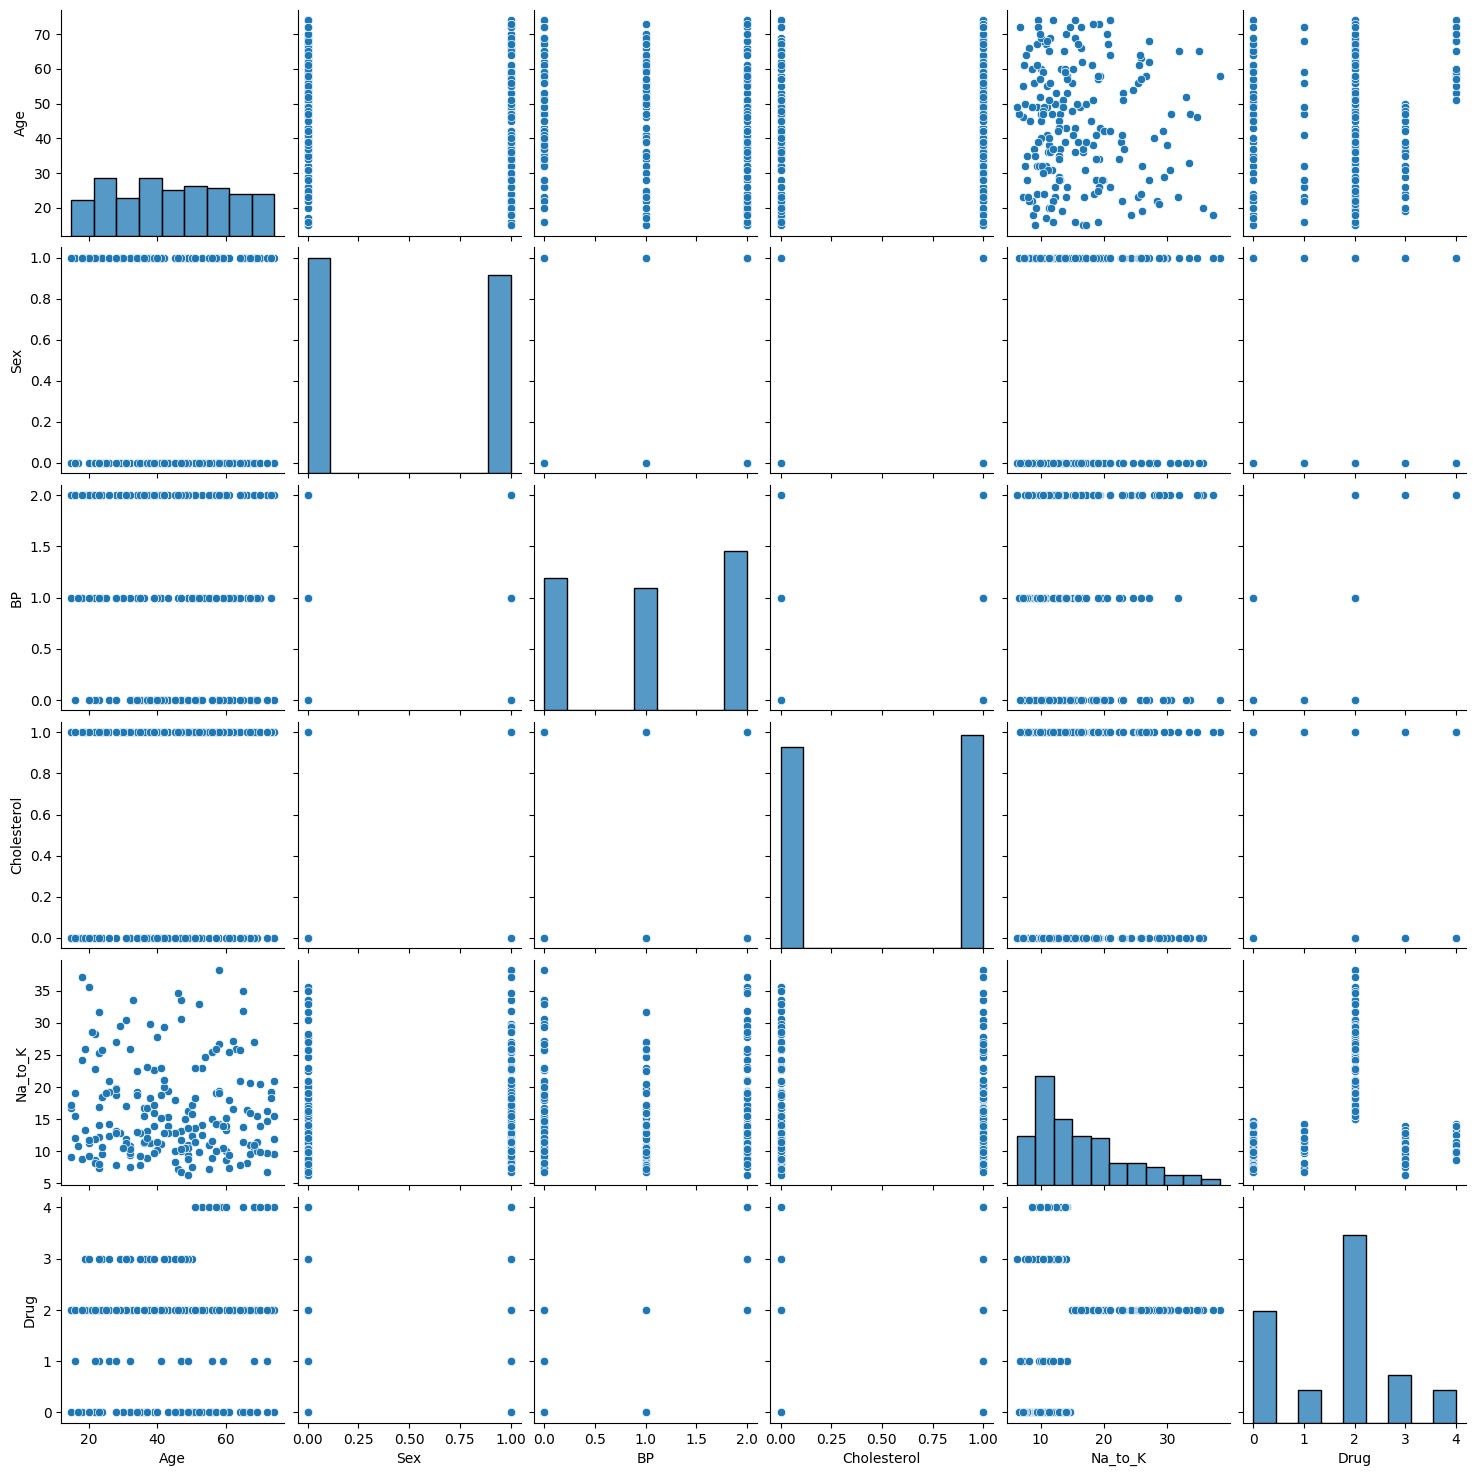

In [777]:
# (ANY_KEYWORD)----> PLOT ALL PLOTS
# (pairplot) ------> PLOT PAIR PLOT
# (BOXPLOT)--------> PLOT OUTLIERS
PLOT("pairplot")

#RUN

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy for our training dataset with tuning is : 77.50%
Accuracy for our training dataset with tuning is : 77.50%
Accuracy for our training dataset with tuning is : 74.58%


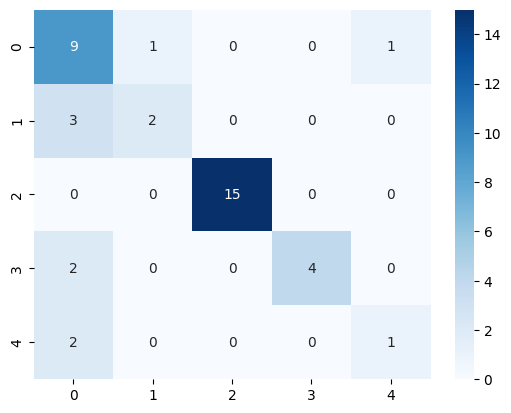

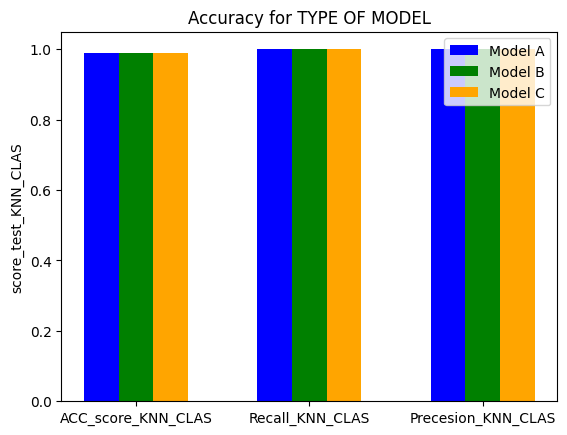

WHICH MODEL WANT TO RUN ?


In [776]:
# (R)-->REGRESSION / (C)-->REGRESSION
# (LIN_R)-->LINEAR(RIDGE) / (XGB_R)-->XGBRegressor / (KNN_C)-->KNNeighboor / (DT_C)-->DesicionTree
# (V)-->VALIDATION
# (NO)-->WITHOUTSCALLING / (MinMaxScaler)-->MinMaxScaler / (StandardScaler)-->StandardScaler / (RobustScaler)-->RobustScaler
GRID('C','KNN_C','CV','NO') #V_MM & V_ROB & V_NO